# Classification Neural Network

In [54]:
# Importing TF and checking the version
import tensorflow as tf
print(tf.__version__)

2.10.0


In [55]:
# Creaye data
from sklearn.datasets import make_circles

# 1000 circles
n_samples = 1000
X, y = make_circles(
    n_samples,
    noise=0.03,
    random_state=42
)

## Function to visualise predictions of the model

In [56]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    # create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )
    # create x values
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
    # make predictions
    y_pred = model.predict(x_in)
    # check for multi-class
    if len(y_pred[0]) > 1:
        print("Doing multi-class classification")
        # so, we re-shaping our pred for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
    # plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

# Non-linear models

## Model 1

In [57]:
# Create a model
model_nl1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# Compile the model
model_nl1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Fit the model
history1 = model_nl1.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 5.9406 - accuracy: 0.4820
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9154 - accuracy: 0.4830
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9010 - accuracy: 0.4820
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8831 - accuracy: 0.4850
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8600 - accuracy: 0.4810
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8002 - accuracy: 0.4800
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7861 - accuracy: 0.4810
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7831 - accuracy: 0.4830
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7726 - accuracy: 0.4840
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7696 - accuracy: 0.4840
Epoch 11/

313/313 [==============================] - 1s 2ms/step
Doing binary classification


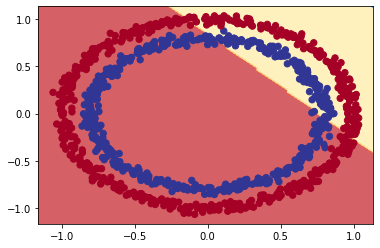

In [58]:
plot_decision_boundary(model_nl1, X, y)

## Model 2

In [59]:
# Create a model
model_nl2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_nl2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Fit the model
model_nl2.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 3.7005 - accuracy: 0.4580
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 3.1051 - accuracy: 0.4570
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 2.6047 - accuracy: 0.4580
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 2.2277 - accuracy: 0.4640
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 1.0146 - accuracy: 0.4670
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9438 - accuracy: 0.4630
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9095 - accuracy: 0.4550
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8841 - accuracy: 0.4540
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8637 - accuracy: 0.4470
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8463 - accuracy: 0.4480
Epoch 11/

313/313 [==============================] - 1s 3ms/step
Doing binary classification


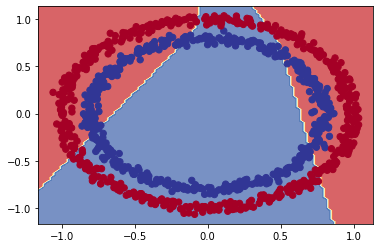

In [60]:
plot_decision_boundary(model_nl2, X, y)

## Model 3

In [61]:
# Create a model
model_nl3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_nl3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Fit the model
history3 = model_nl3.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.7078 - accuracy: 0.4970
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7027 - accuracy: 0.4870
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6995 - accuracy: 0.4940
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6974 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6958 - accuracy: 0.4870
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6946 - accuracy: 0.4910
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.4880
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.4960
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6912 - accuracy: 0.5030
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6904 - accuracy: 0.5050
Epoch 11/

313/313 [==============================] - 2s 4ms/step
Doing binary classification


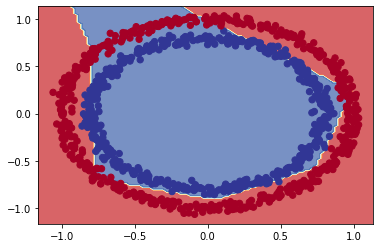

In [62]:
plot_decision_boundary(model_nl3, X, y)

## Model evaluation

In [63]:
# Mock tensor
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

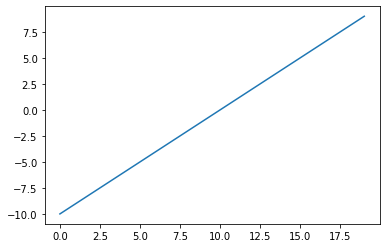

In [64]:
plt.plot(A)

In [65]:
# Replicating sigmoid function
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

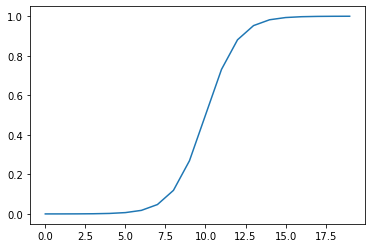

In [66]:
# Apply sigmoid to mock tensor and plot it
plt.plot(sigmoid(A))

In [67]:
# Replicating relu function
def relu(x):
    return tf.maximum(0, x)

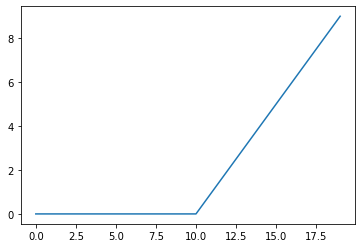

In [68]:
# Aply relu function to mock tensor and plot it
plt.plot(relu(A))

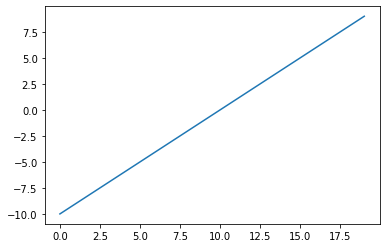

In [69]:
# Checking linear function
plt.plot(tf.keras.activations.linear(A))

In [70]:
# Does linear activation changes anything in tendor? No!
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Splitting dataset into training and testing parts

In [71]:
len(X)

1000

In [72]:
# 80/20 split
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [73]:
# Create a model
model_nl4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_nl4.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

# Fit the model
history4 = model_nl4.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 4ms/step - loss: 0.6882 - accuracy: 0.4988
Epoch 2/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6839 - accuracy: 0.5850
Epoch 3/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6798 - accuracy: 0.5238
Epoch 4/25
25/25 [==============================] - 0s 6ms/step - loss: 0.6735 - accuracy: 0.5913
Epoch 5/25
25/25 [==============================] - 0s 6ms/step - loss: 0.6689 - accuracy: 0.5700
Epoch 6/25
25/25 [==============================] - 0s 6ms/step - loss: 0.6615 - accuracy: 0.5875
Epoch 7/25
25/25 [==============================] - 0s 6ms/step - loss: 0.6527 - accuracy: 0.5950
Epoch 8/25
25/25 [==============================] - 0s 6ms/step - loss: 0.6424 - accuracy: 0.6325
Epoch 9/25
25/25 [==============================] - 0s 6ms/step - loss: 0.6347 - accuracy: 0.6313
Epoch 10/25
25/25 [==============================] - 0s 6ms/step - loss: 0.6297 - accuracy: 0.6263
Epoch 11/25
25/25 [

313/313 [==============================] - 1s 4ms/step
Doing binary classification
313/313 [==============================] - 1s 4ms/step
Doing binary classification


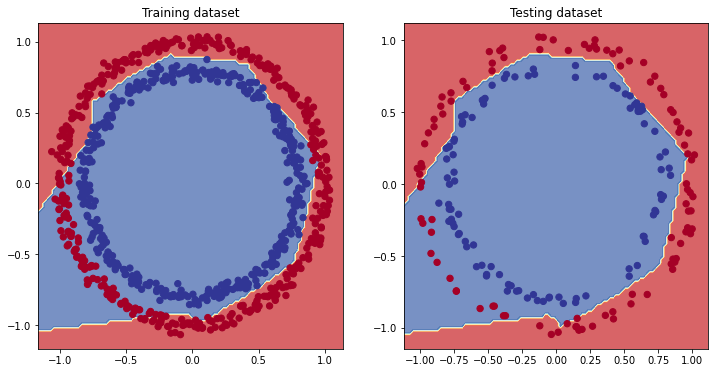

In [74]:
# Plot the decision boundaries for training and testing datasets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Training dataset")
plot_decision_boundary(model=model_nl4, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Testing dataset")
plot_decision_boundary(model_nl4, X_test, y_test)

## Plotting the loss curve

In [75]:
history4.history

{'loss': [0.6881582736968994,
  0.683884859085083,
  0.6797504425048828,
  0.6735403537750244,
  0.6689264178276062,
  0.6614916324615479,
  0.6526737809181213,
  0.6423767805099487,
  0.6347118616104126,
  0.6296514272689819,
  0.6184853911399841,
  0.6015243530273438,
  0.5898227095603943,
  0.574256420135498,
  0.5581574440002441,
  0.5356884598731995,
  0.5153437852859497,
  0.5028340220451355,
  0.47932928800582886,
  0.4610857367515564,
  0.4481033384799957,
  0.4309649169445038,
  0.4121862053871155,
  0.3853694796562195,
  0.3690403401851654],
 'accuracy': [0.4987500011920929,
  0.5849999785423279,
  0.5237500071525574,
  0.5912500023841858,
  0.5699999928474426,
  0.5874999761581421,
  0.5950000286102295,
  0.6324999928474426,
  0.6312500238418579,
  0.6262500286102295,
  0.6274999976158142,
  0.6662499904632568,
  0.6887500286102295,
  0.7287499904632568,
  0.7137500047683716,
  0.7425000071525574,
  0.7537500262260437,
  0.7587500214576721,
  0.768750011920929,
  0.788749992

In [76]:
import pandas as pd

loss_pd4 = pd.DataFrame(history4.history)
loss_pd4

,loss,accuracy
0,0.688158,0.49875
1,0.683885,0.58500
2,0.679750,0.52375
3,0.673540,0.59125
4,0.668926,0.57000
5,0.661492,0.58750
6,0.652674,0.59500
7,0.642377,0.63250
8,0.634712,0.63125
9,0.629651,0.62625


Text(0.5, 1.0, 'Loss curve')

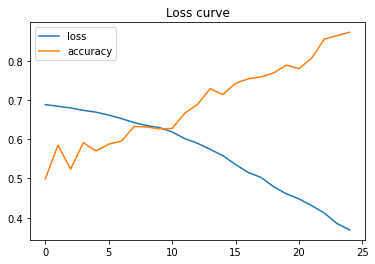

In [77]:
loss_pd4.plot()
plt.title("Loss curve")

## Finding the best learning rate

In [78]:
# Create a model
model_nl5 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_nl5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Introduce a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch / 20))

# Fit the model, along with the learning rate scheduler
history5 = model_nl5.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 2s 6ms/step - loss: 0.7461 - accuracy: 0.4913 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 0.7448 - accuracy: 0.4900 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 0.7435 - accuracy: 0.4863 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 6ms/step - loss: 0.7421 - accuracy: 0.4863 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 0.7406 - accuracy: 0.4850 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7390 - accuracy: 0.4863 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7372 - accuracy: 0.4863 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7354 - accuracy: 0.4825 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss:

In [79]:
loss_pd5 = pd.DataFrame(history5.history)
loss_pd5

,loss,accuracy,lr
0,0.746084,0.49125,0.000100
1,0.744836,0.49000,0.000112
2,0.743490,0.48625,0.000126
3,0.742090,0.48625,0.000141
4,0.740564,0.48500,0.000158
...,...,...,...
95,0.783994,0.51125,5.623413
96,0.742837,0.48125,6.309574
97,0.800609,0.47875,7.079458
98,0.801853,0.48375,7.943282


<AxesSubplot:xlabel='epochs'>

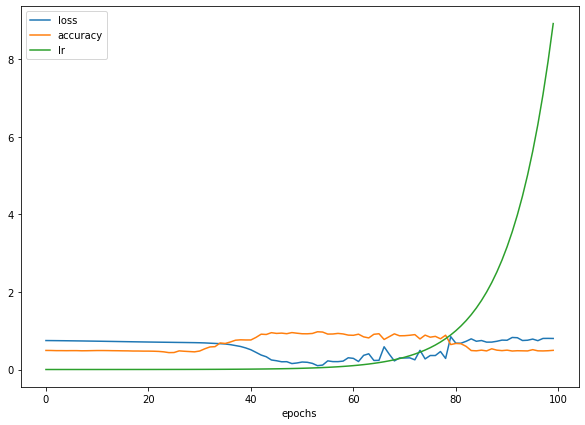

In [80]:
loss_pd5.plot(figsize=(10, 7), xlabel="epochs")

In [81]:
# Learning rate values
lrs = 1e-4 * (10 ** (tf.range(100) / 20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

Text(0.5, 1.0, 'Learning rate vs Loss')

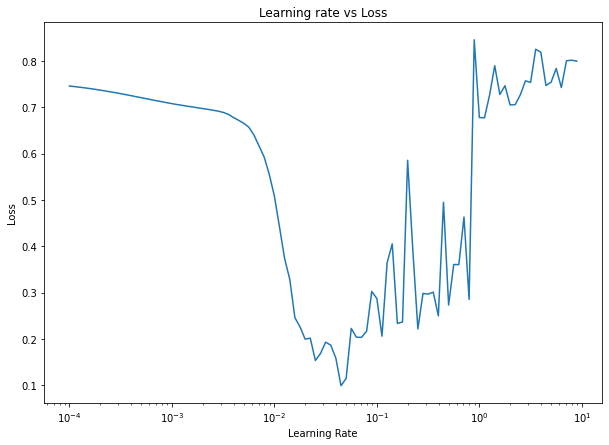

In [82]:
# Plot the learning rate vs loss
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history5.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

## Finding the model accuracy

In [83]:
loss, accuracy = model_nl4.evaluate(X_test, y_test)
print(f"Model's loss: {loss}")
print(f"Model's accuracy: {(accuracy * 100):.2f}%")

7/7 [==============================] - 0s 5ms/step - loss: 0.3560 - accuracy: 0.9200
Model's loss: 0.3560401201248169
Model's accuracy: 92.00%


## Confusion Matrix

In [84]:
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_nl4.predict(X_test)
y_preds[:10]


7/7 [==============================] - 0s 5ms/step


array([[0.664873  ],
       [0.8943289 ],
       [0.825068  ],
       [0.6925693 ],
       [0.3234179 ],
       [0.40127638],
       [0.64674234],
       [0.02633669],
       [0.922397  ],
       [0.125144  ]], dtype=float32)

In [85]:
y_preds_round = tf.round(y_preds)
y_preds_round[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [86]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [87]:
# Create confusioon matrix
confusion_matrix(y_test, y_preds_round)

array([[85, 16],
       [ 0, 99]], dtype=int64)

## Beautifying confusion matrix

In [97]:
import itertools

figsize = (10, 10)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_preds_round)
cm_normalised = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
print("Normalised confusion matrix:\n", cm_normalised)
n_classes = cm.shape[0]
print("Confusion matrix' shape:", cm.shape[0])

Normalised confusion matrix:
 [[0.84158416 0.15841584]
 [0.         1.        ]]
Confusion matrix' shape: 2


In [ ]:
# Let's beautify
